# Exploratory Data Analysis (EDA) for Nutrition Lookup

This notebook analyzes the datasets used by the `OfflineNutritionLookup` model: `food.csv`, `nutrient.csv`, and `food_nutrient.csv`. The goal is to understand the structure of these datasets and the relationships between them.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Load the datasets
data_folder = os.path.join('..', 'nutrition_lookup', 'Data')
food_df = pd.read_csv(os.path.join(data_folder, 'food.csv'))
nutrient_df = pd.read_csv(os.path.join(data_folder, 'nutrient.csv'))
food_nutrient_df = pd.read_csv(os.path.join(data_folder, 'food_nutrient.csv'))

print('Datasets loaded successfully.')

Datasets loaded successfully.


C:\Users\mandu\AppData\Local\Temp\ipykernel_25064\938361930.py:10: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  food_nutrient_df = pd.read_csv(os.path.join(data_folder, 'food_nutrient.csv'))


## 1. Data Overview

Let's examine the first few rows of each dataset.

In [2]:
print('Food Data:')
display(food_df.head())

print('\nNutrient Data:')
display(nutrient_df.head())

print('\nFood Nutrient Data:')
display(food_nutrient_df.head())

Food Data:


,fdc_id,data_type,description,food_category_id,publication_date
0,319874,sample_food,"HUMMUS, SABRA CLASSIC",16.0,2019-04-01
1,319875,market_acquisition,"HUMMUS, SABRA CLASSIC",16.0,2019-04-01
2,319876,market_acquisition,"HUMMUS, SABRA CLASSIC",16.0,2019-04-01
3,319877,sub_sample_food,Hummus,16.0,2019-04-01
4,319878,sub_sample_food,Hummus,16.0,2019-04-01



Nutrient Data:


,id,name,unit_name,nutrient_nbr,rank
0,2047,Energy (Atwater General Factors),KCAL,957.0,280.0
1,2048,Energy (Atwater Specific Factors),KCAL,958.0,290.0
2,1001,Solids,G,201.0,200.0
3,1002,Nitrogen,G,202.0,500.0
4,1003,Protein,G,203.0,600.0



Food Nutrient Data:


,id,fdc_id,nutrient_id,amount,data_points,derivation_id,min,max,median,footnote,min_year_acquired
0,2201847,319877,1051,56.30,1.0,1.0,NaN,NaN,NaN,NaN,NaN
1,2201845,319877,1002,1.28,1.0,1.0,NaN,NaN,NaN,NaN,NaN
2,2201846,319877,1004,19.00,1.0,1.0,NaN,NaN,NaN,NaN,NaN
3,2201844,319877,1007,1.98,1.0,1.0,NaN,NaN,NaN,NaN,NaN
4,2201852,319878,1091,188.00,1.0,1.0,NaN,NaN,NaN,NaN,NaN


## 2. Merging and Visualizing Data

Now, let's merge these datasets to create a comprehensive view and visualize the nutrient data for a sample food item.

C:\Users\mandu\AppData\Local\Temp\ipykernel_25064\1977160578.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='amount', y='name', data=top_nutrients, palette='mako')


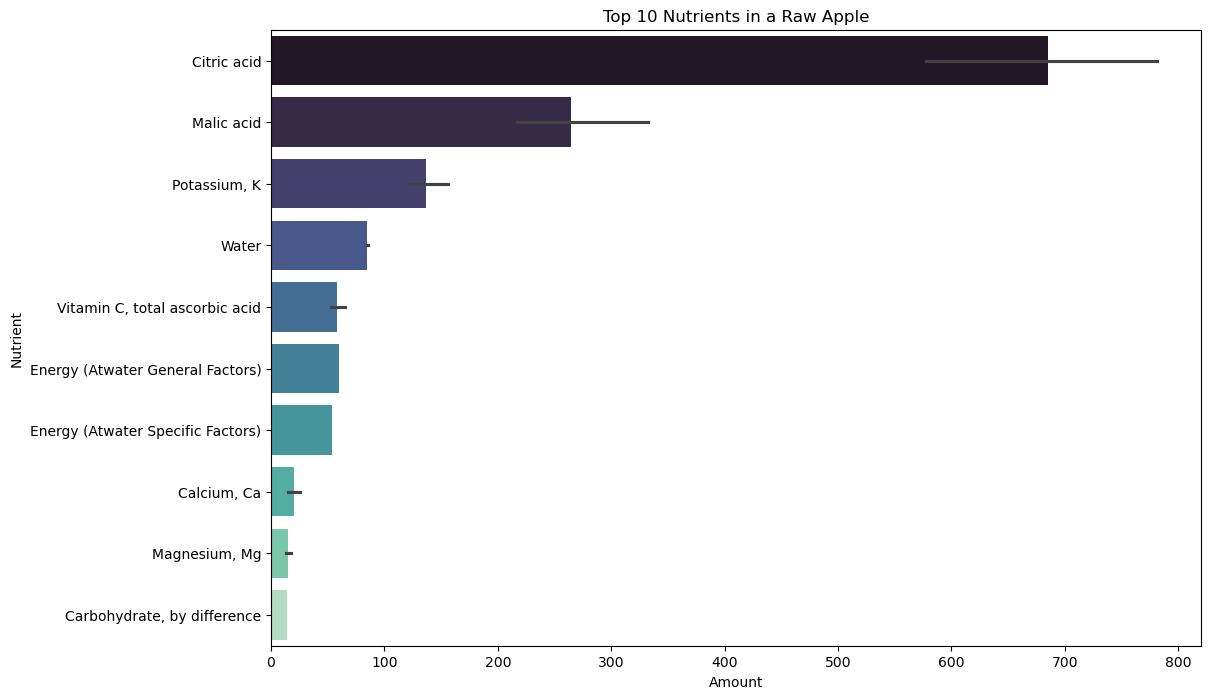

In [15]:
# Merge the datasets
merged_df = pd.merge(food_nutrient_df, food_df, on='fdc_id')
merged_df = pd.merge(merged_df, nutrient_df, left_on='nutrient_id', right_on='id')

# Get nutrient data for a sample food (e.g., 'Apple')
apple_data = merged_df[merged_df['description'].str.contains('apple, raw', na=False)]

# Visualize the top 10 nutrients for the sample food
top_nutrients = apple_data.nlargest(55, 'amount')

plt.figure(figsize=(12, 8))
sns.barplot(x='amount', y='name', data=top_nutrients, palette='mako')
plt.title('Top 10 Nutrients in a Raw Apple')
plt.xlabel('Amount')
plt.ylabel('Nutrient')
plt.show()